<a href="https://colab.research.google.com/github/jenny102292/data-science-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści:
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuronowych)](#a1)
2. [Import bibliotek](#a2)
3. [Załadowanie i przygotowanie danych](#a3)
4. [Eksploracja danych](#a4)
5. [Budowa sieci neuronowej](#a5)
6. [Trenowanie modelu](#a6)
7. [Ocena modelu](#a7)
8. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)

### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuronowych)

Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykoszystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowanie sieci.

Zbiór MINST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczości 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

### <a name='a2'></a> Import bibliotek

In [12]:
# Użyj poniższego polecenia jeżeli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.18.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [14]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [15]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [16]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [17]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

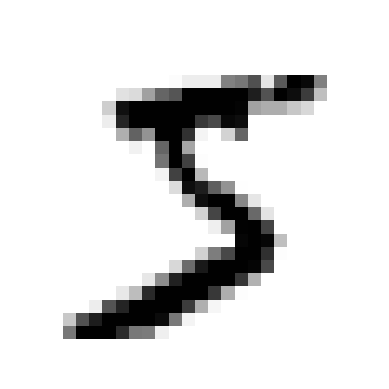

In [18]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

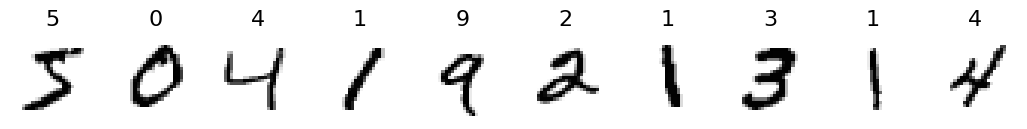

In [43]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> Budowa sieci neuronowej

In [22]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> Trenowanie modelu

In [23]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8567 - loss: 0.4817
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9554 - loss: 0.1541
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9684 - loss: 0.1082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0.0847
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9763 - loss: 0.0727


### <a name='a7'></a> Ocena modelu

In [24]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9794 - loss: 0.0700


[0.07003849744796753, 0.9793999791145325]

In [25]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.913250,0.295382
1,0.957067,0.144908
2,0.967600,0.107604
3,0.973350,0.087756
4,0.976233,0.074858


In [27]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [28]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.000000006505, 0.000000000928, 0.000000963695, ..., 0.99991304    , 0.000000493303, 0.000001109943],
       [0.00000005313 , 0.000007005607, 0.99999183    , ..., 0.            , 0.000000027988, 0.000000000027],
       [0.000000040105, 0.9987288     , 0.00018626137 , ..., 0.0009284275  , 0.0001230961  , 0.000000609956],
       ...,
       [0.000000000006, 0.000000003391, 0.000000000168, ..., 0.000004216996, 0.000026762546, 0.0007001974  ],
       [0.00000000319 , 0.000000002815, 0.000000000001, ..., 0.000000017257, 0.000006884642, 0.000000000019],
       [0.000000429091, 0.000000000924, 0.000000038399, ..., 0.00000000001 , 0.000000007672, 0.000000000559]],
      dtype=float32)

In [29]:
y_pred = model.predict_classes(X_test)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [34]:
# Replace the line causing the error:
# y_pred = model.predict_classes(X_test)
# with the following lines:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [38]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([247, 259, 290, 321, 340, 381, 445, 447, 449, 507], dtype='int64')

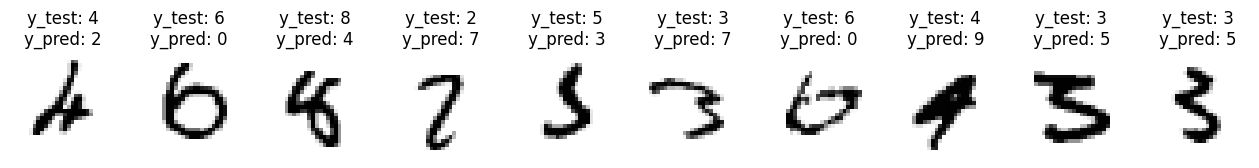

In [42]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()